# 결정트리

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/wine_data'

In [4]:
df = pd.read_csv(url)
df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,Y,test_size=0.3, random_state=0)

In [11]:
# 로지스틱회귀를 적용해서 품질을 분류

In [17]:
df['class'].value_counts(), np.unique(y_train,return_counts=True)

(1.0    4898
 0.0    1599
 Name: class, dtype: int64,
 (array([0., 1.]), array([1121, 3426], dtype=int64)))

In [29]:
# 1.0 red wine
# 0.0 white wine
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.7752364196173301, 0.7917948717948718)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [41]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train_poly,y_train)
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.8616670332087091, 0.8784615384615385)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt.score(x_train,y_train), dt.score(x_test, y_test)

(0.9982405981966131, 0.8656410256410256)

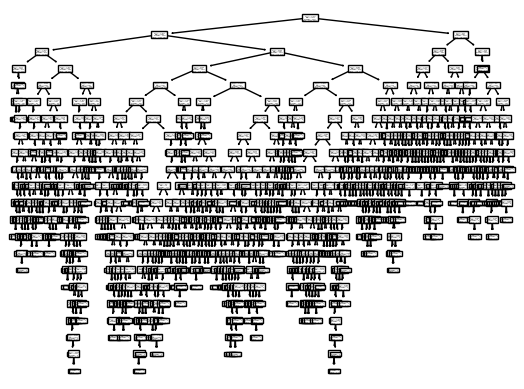

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

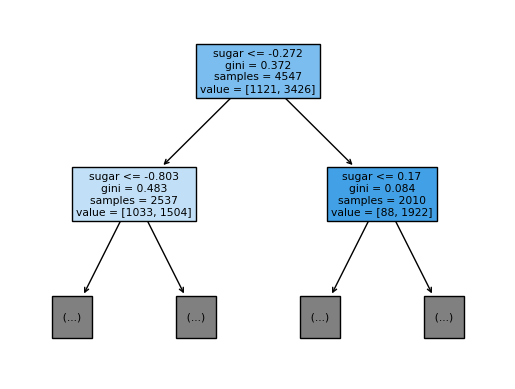

In [48]:
df.columns[:-1]
plot_tree(dt,max_depth=1,feature_names=df.columns[:-1],filled=True)
plt.show()

In [ ]:
# 불순도 : gini계수  criterion 매개변수의 값 기본셋팅 - 노드를 분할하는 조건
#          클래스별 비율을 가지고 계산 - 스케일링이 영향을 미치지 않음
# 지니불순도 : 1 - (음성클래스비율**2 + 양성클래스비율**2)   1 - ( (  1121/4547)**2 + (3426/4547)**2 ) = 0.372
# 부모와 자식의 지니불순도의 차이가 크면 트리를 성장시킨다

In [57]:
# 과적합 해결 - 트리를 가지키기 즉 학습을 제한.... deepth를 조정
from sklearn.tree import DecisionTreeClassifier
train_score,test_score = [],[]
for d in range(1,21):
    dt = DecisionTreeClassifier(max_depth=d, random_state=0)
    dt.fit(x_train,y_train)
    train_score.append(dt.score(x_train,y_train))
    test_score.append(dt.score(x_test, y_test))

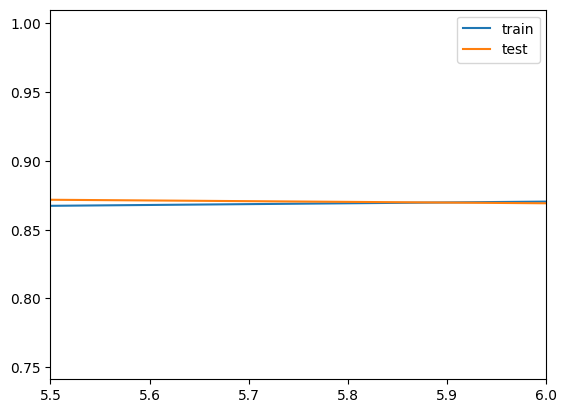

In [62]:
plt.plot(range(1,21),train_score,label = 'train')
plt.plot(range(1,21),test_score, label='test')
plt.xlim(5.5,6.0)
plt.legend()
plt.show()

In [64]:
dt = DecisionTreeClassifier(max_depth=6, random_state=0)
dt.fit(x_train,y_train)
dt.score(x_train,y_train),dt.score(x_test, y_test)

(0.8704640422256433, 0.8692307692307693)

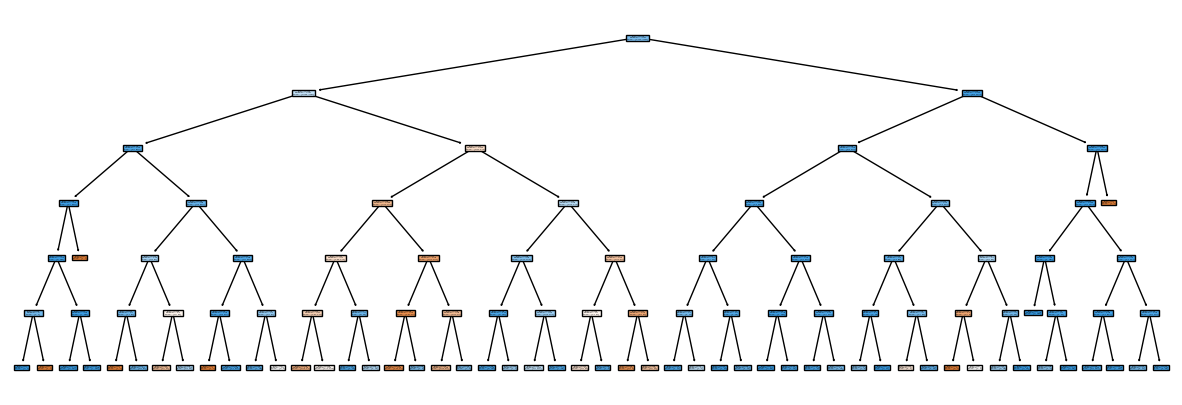

In [66]:
plt.figure(figsize=(15,5))
plot_tree(dt,filled=True,feature_names=df.columns[:-1])
showlt.show()

In [68]:
dt.feature_importances_ , df.columns[:-1]

(array([0.16461284, 0.70244692, 0.13294025]),
 Index(['alcohol', 'sugar', 'pH'], dtype='object'))

### 머신러닝에서 random state 값을 변경하면.. 데이터가 섰이는 정도가 변경되서... 결과적으로 성능이 달라짐

In [74]:
trainX,x_test,trainY,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [76]:
x_train,x_val,y_train,y_val =  train_test_split(trainX,trainY,test_size=0.2,random_state=0)

In [78]:
x_train.shape, x_val.shape,x_test.shape

((4157, 3), (1040, 3), (1300, 3))

In [80]:
dt = DecisionTreeClassifier(max_depth=6,random_state=0)
dt.fit(x_train,y_train)
dt.score(x_train,y_train), dt.score(x_val,y_val)

(0.8741881164301178, 0.8634615384615385)

In [81]:
dt.score(x_test,y_test)

0.8684615384615385

# 교차검증 : k-폴드.. 접히는 숫자.. 즉.. 균등하게 나눈 숫자

In [82]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt,X,Y)
scores

{'fit_time': array([0.00600982, 0.00595522, 0.00498581, 0.00398874, 0.00498748]),
 'score_time': array([0.00099754, 0.        , 0.        , 0.00102663, 0.00099778]),
 'test_score': array([0.84076923, 0.82846154, 0.85604311, 0.84372594, 0.85989222])}

In [83]:
np.mean(scores['test_score'])

0.8457784094273701

In [90]:
dt = DecisionTreeClassifier(random_state=0)
scores = cross_validate(dt,X,Y)
np.mean(scores['test_score'])

0.8122213537040327

# cross_validate 
    장점 : 모델객체를 선택하고 바로 테스트 할수 있다. 즉.. 최상의 점수를 가늠할 수 있다
    단점 : 데이터를 섞지 않는다.

# 데이터를 섞기 위해서는 분할기(spliter)를 지정
    회귀일때는 KFold 분할기
    분류일때는 StratifiedKFold 분할기

In [100]:
from sklearn.model_selection import StratifiedKFold
spliter = StratifiedKFold(n_splits=20)
dt = DecisionTreeClassifier(random_state=0)
scores = cross_validate(dt,X,Y, cv=spliter )
np.mean(scores['test_score'])

0.8691310357977026

In [110]:
# 사용가능한 머신러닝 모델 종류를 선택해서 대략적인 성능 테스트를 교차검증을 통해 수행한다
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()
lr = LogisticRegression()
sgd = SGDClassifier()
kn =  KNeighborsClassifier()

spliter = StratifiedKFold(n_splits=50)

dt_scores = cross_validate(dt,X,Y, cv=spliter )
lr_scores = cross_validate(lr,X,Y, cv=spliter )
sgd_scores = cross_validate(sgd,X,Y, cv=spliter )
kn_scores = cross_validate(kn,X,Y, cv=spliter )

In [108]:
def printScore(model):
    print( np.mean(model['test_score']) )

In [111]:
printScore(dt_scores)
printScore(lr_scores)
printScore(sgd_scores)
printScore(kn_scores)

0.8222397137745975
0.7797614788312462
0.7820787119856887
0.8456302921884317


In [103]:
# 성능이 우수한 모델을 최종 선택하고.. --> 하이퍼 파라메터 튜닝

In [113]:
# max_depth = [1,2,3,4,5,6,7,8,9,10]
# min_samples_split = [2,3,4,5,6]
# min_impurity_decrease

In [169]:
df = pd.read_csv(url)
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
X.shape, Y.shape

((6497, 3), (6497,))

In [170]:
# 하이퍼 파라메터 튜닝은 그리드서치클래스가 제공하는 알고리즘을 이용
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':range(1,25),
    'min_samples_split':range(2,100,10),
    'min_impurity_decrease':np.arange(0.0001,0.001,0.0001)
}

In [171]:
dt = DecisionTreeClassifier(random_state=0)

In [172]:
gs = GridSearchCV(dt,param_grid=params,n_jobs=-1)

In [173]:
gs.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 25),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [174]:
gs.best_params_, gs.best_score_

({'max_depth': 8,
  'min_impurity_decrease': 0.0009000000000000001,
  'min_samples_split': 42},
 0.8528590039675489)

In [175]:
best_dt = gs.best_estimator_

In [176]:
best_dt.score(X,Y)

0.8719408957980607

In [177]:
temp = DecisionTreeClassifier(random_state=0,max_depth=10,min_impurity_decrease=0.0005,min_samples_split=5)
temp.fit(x_train,y_train)
temp.score(x_train,y_train)

0.8833293240317537

In [179]:
gs.cv_results_['mean_test_score']

array([0.75388642, 0.75388642, 0.75388642, ..., 0.85055107, 0.8513209 ,
       0.8513209 ])

In [180]:
np.mean(gs.cv_results_['mean_test_score'])

0.8412022543091443

In [181]:
# 그리드 서치를 사용하는 방법
# 1. 탐색할 매개변수를 선택
# 2. 그리드서치를 수행
# 3. 최상의 모델을 저장..
# 4. 사용

# 랜덤서치
    매개변수의 수치를 조정할때. 어느선에서 할지 결정하기 애매한 경우
    매개변수를 샘플링 할 수 있는 확률분포객체를 전달
    사이파이에서 제공하는 함수를 사용

In [183]:
from scipy.stats import uniform, randint

In [185]:
# 주어진 범위에서 고르게 값을 뽑는걸.... 균등 분포에서 샘플링 한다
# randint 정수
# uniform은 실수
# 0 ~ 10

In [194]:
rgen = randint(0,10)
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 90,  87, 119,  89,  98, 121, 107, 116,  93,  80], dtype=int64))

In [195]:
ugen =  uniform(0,1)
ugen.rvs(10)

array([0.81198748, 0.98958442, 0.48325131, 0.51588443, 0.6155096 ,
       0.93750532, 0.76671185, 0.4567113 , 0.58735967, 0.24356691])

In [197]:
params = {
    'max_depth':randint(1,50),
    'min_samples_split':range(2,100),
    'min_impurity_decrease':uniform(0.0001,0.001),
    'min_samples_leaf':randint(1,20)
}